# **IMPORTING LIBRARIES**

In [462]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# **Read Dataset**

In [463]:
df = pd.read_excel('Copy of loan.xlsx')
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [465]:
df = df.drop('Loan_ID', axis=1)

In [466]:
#Checking the data types of columns
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [467]:
#let’s have a look if the data has missing values or not:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [468]:
#let’s have a look at the descriptive statistics of the dataset before filling in the missing values:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [469]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [470]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# **Data Exploration and Visualization**

## *Distribution of the loan status*





In [471]:
fig_loan_status=px.histogram(df,x='Loan_Status',title='Loan Status Distribution')
fig_loan_status.show()

## *Distribution of  Gender*

In [472]:
fig_gender=px.histogram(df,x='Gender',title='Gender Distribution',color_discrete_sequence = ['darkseagreen'])
fig_gender.show()

## *Distribution of the Martial Status*

In [473]:
married_count = df['Married'].value_counts()
fig_married = px.bar(married_count,x=married_count.index,y=married_count.values,title='Marital Status Distribution')
fig_married.update_traces(marker_color = 'red')
fig_married.show()

## *Distribution of the Self-employment*

In [474]:
self_employed_count = df['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count, x=self_employed_count.index, y=self_employed_count.values, title='Self-Employment Distribution')
fig_self_employed.update_traces(marker_color = 'navy')
fig_self_employed.show()

## *Education Distribution*

In [475]:
fig_education=px.histogram(df,x='Education',title='Education Distribution',color_discrete_sequence = ['darkseagreen'])
fig_education.show()

## *Distribution of the Applicant Income*

In [476]:
fig_applicant_income = px.histogram(df, x='ApplicantIncome', title='Applicant Income Distribution')
fig_applicant_income.show()

## *Distribution of Coapplicant Income*

In [477]:
fig_coapplicant_income = px.histogram(df, x='CoapplicantIncome', title='Coapplicant Income Distribution')
fig_coapplicant_income.show()

## Loan Amount Distribution

In [478]:
fig_loan_amount = px.histogram(df, x='LoanAmount', title='Loan Amount Distribution')
fig_loan_amount.show()

## *Applicant Income vs.Loan Amount*

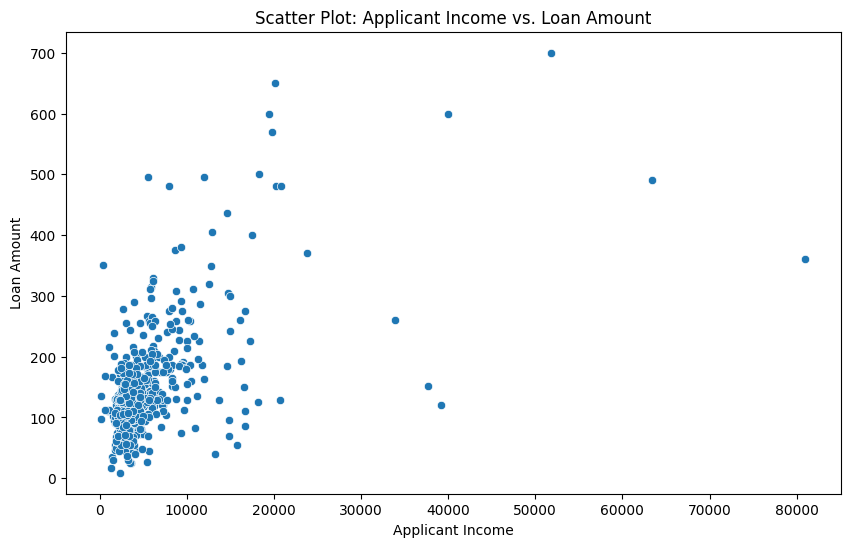

In [479]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.show()


## *Married vs. Applicant Income*

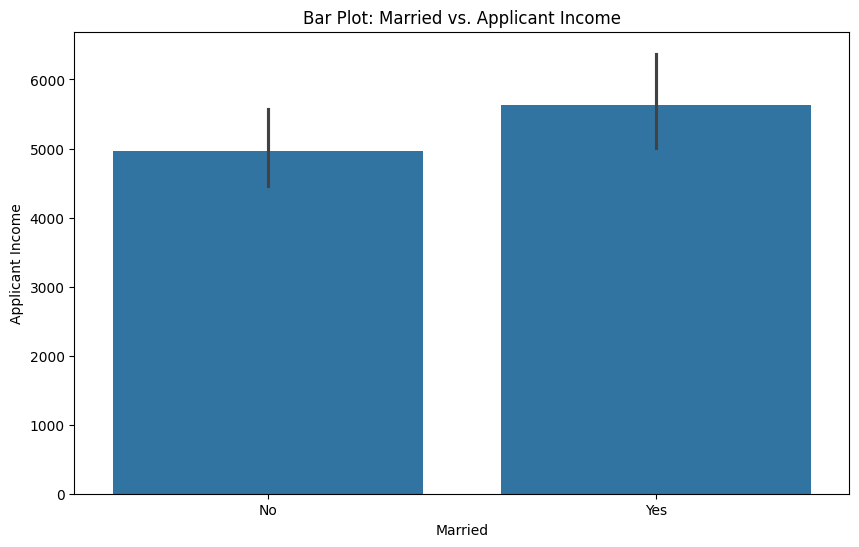

In [480]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Married', y='ApplicantIncome')
plt.xlabel('Married')
plt.ylabel('Applicant Income')
plt.title('Bar Plot: Married vs. Applicant Income')
plt.show()

## *Applicant Income vs. Education*

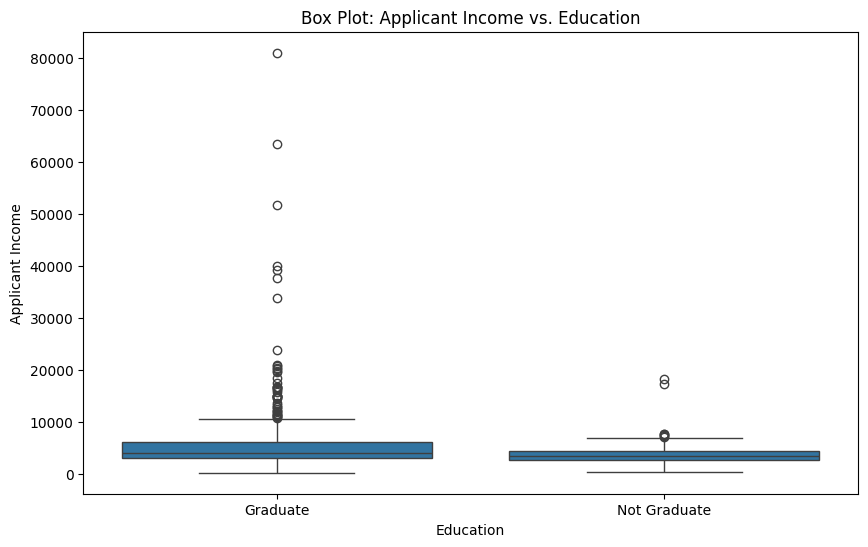

In [481]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='ApplicantIncome')
plt.ylabel('Applicant Income')
plt.xlabel('Education')
plt.title('Box Plot: Applicant Income vs. Education')
plt.show()

## *Credit History vs. Loan Status*

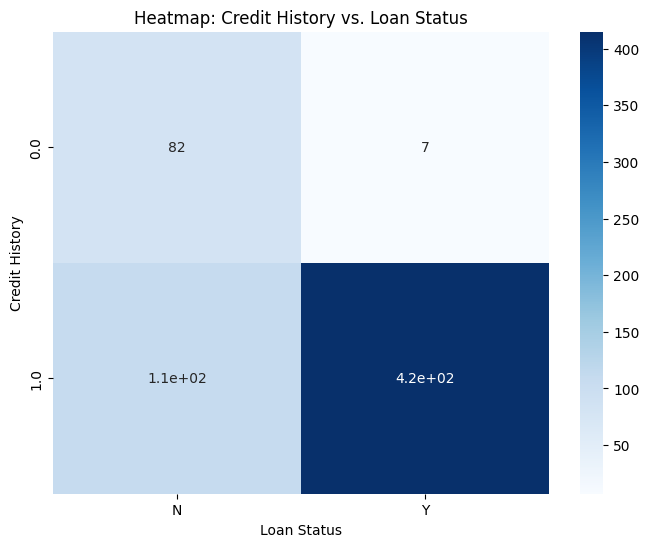

In [482]:
df['Credit_History'] = pd.to_numeric(df['Credit_History'], errors='coerce')
cross_tab = pd.crosstab(df['Credit_History'], df['Loan_Status'])
plt.figure(figsize=(8,6))
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.xlabel('Loan Status')
plt.ylabel("Credit History")
plt.title('Heatmap: Credit History vs. Loan Status')
plt.show()


## *Loan_Status vs Property_Area*

In [483]:
fig_property_area = px.histogram(df, x='Property_Area', color='Loan_Status', barmode='group', title='Loan_Status vs Property_Area')
fig_property_area.show()

### *Detecting outliers and removing them*

In [484]:
fig_income = px.box(df, x='Loan_Status', y='ApplicantIncome', color="Loan_Status", title='Loan_Status vs ApplicantIncome')
fig_income.show()

In [485]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

In [486]:
fig_income = px.box(df, x='Loan_Status', y='ApplicantIncome', color="Loan_Status", title='Loan_Status vs ApplicantIncome')
fig_income.show()

In [487]:
fig_coapplicant_income = px.box(df, x='Loan_Status', y='CoapplicantIncome', color="Loan_Status", title='Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()

In [488]:
# Calculate the IQR
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'])]

## *Relationship between the Property Area and the Loan Status*

In [489]:
fig_property_area = px.histogram(df, x='Property_Area', color='Loan_Status', barmode='group', title='Loan_Status vs Property_Area')
fig_property_area.show()

## *Relationship between Credit History and Loan Status*

In [490]:
#Now let’s have a look at the relationship between credit history and loan status:

fig_credit_history = px.histogram(df, x='Credit_History', color='Loan_Status', barmode='group', title='Loan_Status vs Credit_His')
fig_credit_history.show()

# **Data Preparation**

In [491]:
col_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']
for col in col_to_encode:
    print(f"Cột '{col}': {df[col].apply(type).unique()}")

Cột 'Gender': [<class 'str'>]
Cột 'Married': [<class 'str'>]
Cột 'Dependents': [<class 'int'> <class 'str'>]
Cột 'Education': [<class 'str'>]
Cột 'Self_Employed': [<class 'str'>]
Cột 'Property_Area': [<class 'str'>]
Cột 'Loan_Status': [<class 'str'>]


In [492]:
df['Dependents'] = df['Dependents'].astype(str)

In [493]:
#Convert categorical Columns into numerical ones
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']
for i in col_to_encode:
    df[i] = le.fit_transform(df[i])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0


In [494]:
# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [495]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,0.608614,-0.402801,-0.248490,0.259251,0.406808,0,0
3,1,1,0,1,0,-0.611545,-0.153896,-0.380965,0.259251,0.406808,2,1
5,1,1,2,0,1,1.117421,0.384325,2.053258,0.259251,0.406808,2,1
6,1,1,0,1,0,-0.764065,-0.400458,-0.794949,0.259251,0.406808,2,1
7,1,1,3,0,0,-0.335179,-0.111142,0.248290,0.259251,-2.458161,1,0


In [496]:
# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Model Building and Evaluation**

In [497]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)
print("\n")

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("\n")

svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_report_svc = classification_report(y_test, y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("\nSVC:")
print("Accuracy: ", accuracy_svc)
print("\nClassification Report: ", classification_report_svc)
print("\nConfusion Matrix: \n", confusion_matrix_svc)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nXGBoost Classifier:")
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", classification_rep_xgb)
print("Confusion Matrix:\n", confusion_mat_xgb)

dct_model=DecisionTreeClassifier(random_state=42)
dct_model.fit(X_train,y_train)
y_pred_dct=dct_model.predict(X_test)
accuracy_dct=accuracy_score(y_test,y_pred_dct)
classification_rep_dct=classification_report(y_test,y_pred_dct)
confusion_mat_dct=confusion_matrix(y_test,y_pred_dct)
print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_dct)
print("Classification Report:\n", classification_rep_dct)
print("Confusion Matrix:\n", confusion_mat_dct)


Logistic Regression:
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.56      0.70        27
           1       0.86      0.99      0.92        73

    accuracy                           0.87       100
   macro avg       0.90      0.77      0.81       100
weighted avg       0.88      0.87      0.86       100

Confusion Matrix:
 [[15 12]
 [ 1 72]]



Random Forest Classifier:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.59      0.70        27
           1       0.86      0.96      0.91        73

    accuracy                           0.86       100
   macro avg       0.85      0.78      0.80       100
weighted avg       0.86      0.86      0.85       100

Confusion Matrix:
 [[16 11]
 [ 3 70]]



SVC:
Accuracy:  0.85

Classification Report:                precision    recall  f1-score   support

           0       0.93      0.48    

# **Hyperparameter Tuning**

In [498]:
from sklearn.model_selection import GridSearchCV

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

log_reg_grid = GridSearchCV(log_reg_model, param_grid=log_reg_params, cv=3)

log_reg_grid.fit(X_train, y_train)

log_reg_best = log_reg_grid.best_estimator_

y_pred_log_reg = log_reg_best.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression:")
print(f"Best parameters: {log_reg_grid.best_params_}")
print(f"Best Cross-Validation Score: {log_reg_grid.best_score_}")
print(f"Accuracy: {accuracy_log_reg}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression:
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8354978354978355
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.52      0.67        27
           1       0.85      0.99      0.91        73

    accuracy                           0.86       100
   macro avg       0.89      0.75      0.79       100
weighted avg       0.87      0.86      0.85       100

Confusion Matrix:
[[14 13]
 [ 1 72]]


In [499]:
## TAken data from the dataset
t = log_reg_best.predict([[0.0,	0.0, 0.0, 1, 0.0, 1811, 1666.0, 54.0, 360.0, 1.0, 2]])

In [500]:
import pickle
file="model_ml.pkl"
with open(file,'wb') as f:
    pickle.dump(log_reg_best,f)

In [501]:
with open(file,'rb') as f:
    mp=pickle.load(f)

In [502]:
cy = mp.predict([[0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1]])
print(cy)

[1]
